## Example Usage of UniFace Library for Face Alignment
This guide demonstrates how to use the **UniFace** library for face detection and face alignment. Follow the steps below to set up and execute the example.

## 1. Install UniFace
Install the **UniFace** library using `pip`. The `-q` flag suppresses logs for a clean output.

In [1]:
!pip install -q uniface

## 2. Import Required Libraries
Import the necessary libraries for image processing, visualization and face alignment:

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from uniface import RetinaFace, face_alignment, draw_detections

- `cv2`: Used for image reading and processing.
- `numpy`: Used for converting model outputs to numpy.
- `matplotlib`: To display inference resulst
- `RetinaFace`: The model class from the **UniFace** library.
- `face_alignment`: A utility function for face alignment.
- `draw_detections`: A utility function to draw bounding boxes and landmarks on the image.

## 3. Initialize the RetinaFace Model
Initialize the RetinaFace model with a lightweight pre-trained backbone and detection parameters:

In [3]:
# Initialize the RetinaFace model
uniface_inference = RetinaFace(
    model="retinaface_mnet_v2",  # Model name
    conf_thresh=0.5,             # Confidence threshold
    pre_nms_topk=5000,           # Pre-NMS Top-K detections
    nms_thresh=0.4,              # NMS IoU threshold
    post_nms_topk=750            # Post-NMS Top-K detections,
)

2024-11-21 05:54:31,818 - INFO - Initializing RetinaFace with model=retinaface_mnet_v2, conf_thresh=0.5, nms_thresh=0.4, pre_nms_topk=5000, post_nms_topk=750, dynamic_size=False, input_size=(640, 640)
2024-11-21 05:54:31,875 - INFO - Verified model weights located at: /home/yakhyo/.uniface/models/retinaface_mnet_v2.onnx
2024-11-21 05:54:31,969 - INFO - Successfully initialized the model from /home/yakhyo/.uniface/models/retinaface_mnet_v2.onnx


## 4. Load and perform inference
Load set of input images to perform face detection and alignment, storing the results for visualization.

In [4]:
# Paths to the input images
image_paths = [
    "../assets/image0.jpg",
    "../assets/image1.jpg",
    "../assets/image2.jpg",
    "../assets/image3.jpg"
]

# Lists to store detection results and aligned images
detection_images = []
aligned_images = []

# Process each image
for image_path in image_paths:
    # Load the image
    input_image = cv2.imread(image_path)
    if input_image is None:
        print(f"Error: Could not read image from {image_path}")
        continue
    
    # Perform face detection
    boxes, landmarks = uniface_inference.detect(input_image)

    if len(landmarks) == 0:
        print(f"No face detected in {image_path}")
        continue
    
    # Draw detections on the image for visualization
    bbox_image = input_image.copy()
    draw_detections(bbox_image, (boxes, landmarks), vis_threshold=0.6)

    # Align the first detected face
    landmark_array = landmarks[0]
    aligned_image = face_alignment(input_image, landmark_array, image_size=112)
    
    # Convert images to RGB format for proper visualization
    bbox_image = cv2.cvtColor(bbox_image, cv2.COLOR_BGR2RGB) 
    aligned_image = cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB)
    
    # Store the processed images for visualization
    detection_images.append(bbox_image)
    aligned_images.append(aligned_image)

## 5. Display inference results
Visualization of face detection and alignment.

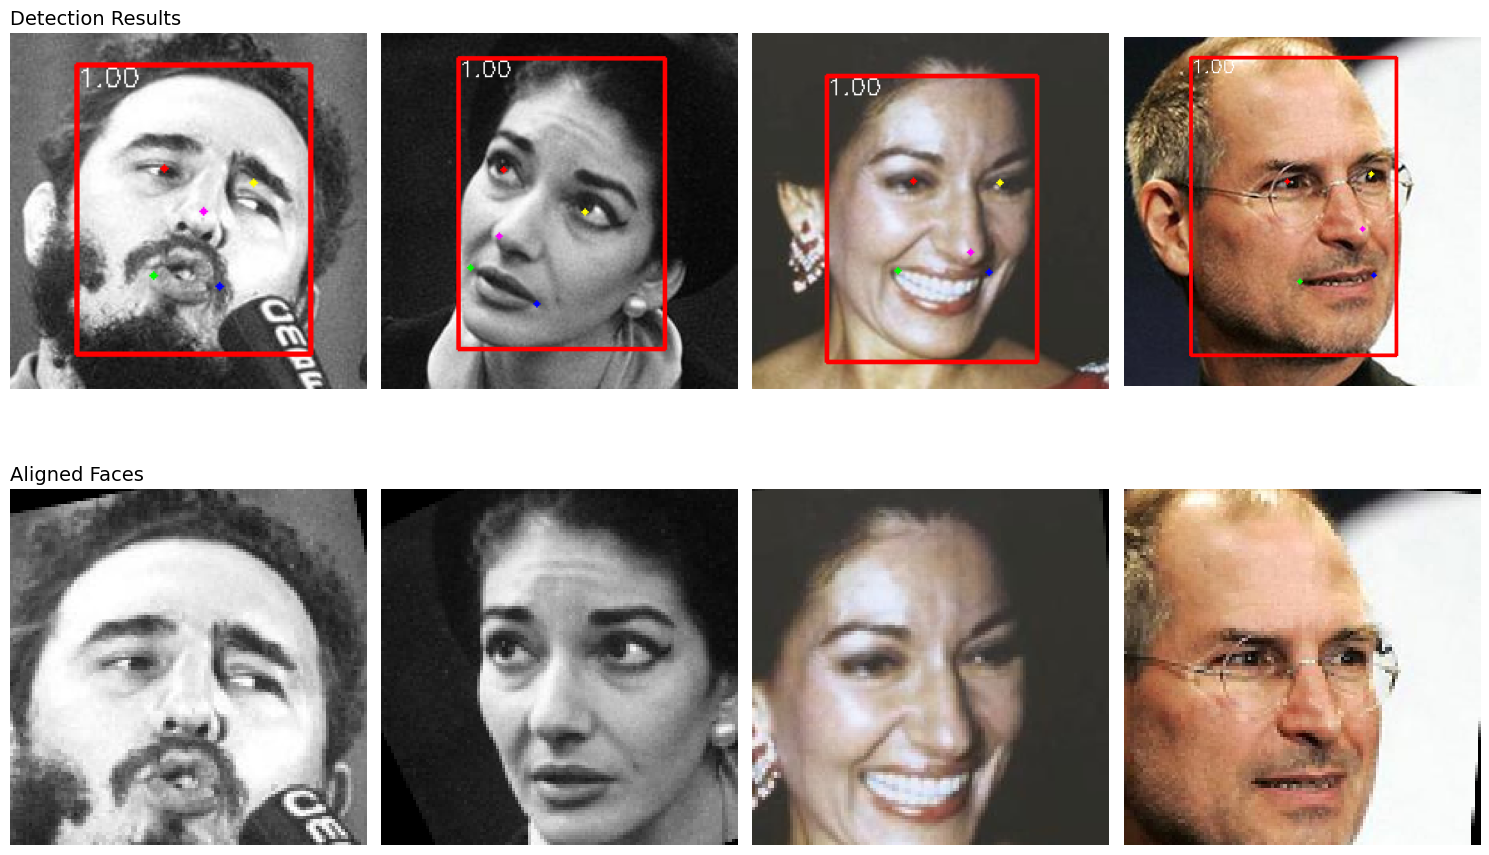

In [5]:
# Plot images in a 2-row layout
fig, axes = plt.subplots(2, len(image_paths), figsize=(15, 10))

# Titles for each row
row_titles = ["Detection Results", "Aligned Faces"]

# Populate the grid with images
for row, images in enumerate([detection_images, aligned_images]):
    for col, img in enumerate(images):
        # Display each image in the grid
        axes[row, col].imshow(img)
        axes[row, col].axis("off")  # Remove axes for cleaner visuals
        
        # Set row title on the first column of each row
        if col == 0:
            axes[row, col].set_title(row_titles[row], fontsize=14, loc="left")

# Adjust layout to prevent overlap and display the plot
plt.tight_layout()
plt.show()
